# 3.6 Lab: Linear Regression

## 3.6.2 Simple Linear Regression

In [1]:
%matplotlib inline

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

In [6]:
boston = pd.read_csv("Boston.csv")

In [7]:
boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### linear_model

In [36]:
from sklearn import linear_model

lm = linear_model.LinearRegression(fit_intercept=True) 

x_train = boston['lstat'].values.reshape(-1, 1)
y_true = boston['medv']
lm.fit(x_train, y_true)

lm.intercept_, lm.coef_

(34.55384087938311, array([-0.95004935]))

### metrics

In [37]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

y_pred = lm.predict(boston['lstat'].values.reshape(-1, 1))

lm_summary = {'R2': r2_score(y_true, y_pred), 
            'Ex. Var': explained_variance_score(y_true, y_pred), 
                  'MSE': mean_squared_error(y_true, y_pred)}

for k, v in lm_summary.items():
    print(k, ':', v)

R2 : 0.5441462975864799
Ex. Var : 0.5441462975864798
MSE : 38.48296722989414


### out-of-sample predictions

In [38]:
lm.predict(np.array([5, 10, 15]).reshape(-1, 1))

array([29.80359411, 25.05334734, 20.30310057])

In [39]:
import statsmodels.api as sm

x_train = boston['lstat']
y_true = boston['medv']

lm_sm = sm.OLS(y_true,sm.add_constant(x_train))

/Users/xieh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
lm_sum = lm_sm.fit()
lm_sum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           5.08e-88
Time:                        13:51:16   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Prediction
lm_sum.predict(sm.add_constant([5, 10, 15]))

array([29.80359411, 25.05334734, 20.30310057])

add interval to prediction

In [16]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from collections import OrderedDict

In [44]:
y_pred = lm_sum.predict(sm.add_constant(x_train))
prstd, iv_l, iv_u = wls_prediction_std(lm_sum)

pred_dict = OrderedDict({'x_train': x_train,
                         'y_pred': y_pred, 
                         'y_true': y_true, 
                         'lwr': iv_l, 
                         'upr': iv_u, 
                         'pred_se': prstd})

pd.DataFrame(pred_dict)

/Users/xieh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,x_train,y_pred,y_true,lwr,upr,pred_se
0,4.98,29.822595,24.0,17.584603,42.060587,6.228994
1,9.14,25.870390,21.6,13.643413,38.097367,6.223387
2,4.03,30.725142,34.7,18.483488,42.966796,6.230858
3,2.94,31.760696,33.4,19.514315,44.007076,6.233264
4,5.33,29.490078,36.2,17.253328,41.726828,6.228362
...,...,...,...,...,...,...
501,9.67,25.366864,22.4,13.140702,37.593025,6.222972
502,9.08,25.927393,20.6,13.700315,38.154470,6.223438
503,5.64,29.195563,23.9,16.959864,41.431261,6.227826
504,6.48,28.397521,22.0,16.164444,40.630598,6.226492


/Users/xieh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lstat', ylabel='medv'>

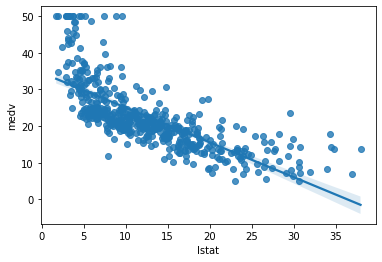

In [20]:
sns.regplot('lstat','medv',data=boston)

for computing the residuals from a linear regression fit using the residuals() function. 
The function rstudent() will return the studentized residuals, and we can use this function to plot the residuals against the fitted values.

In [51]:
# residuals and studentized residuals

In [50]:
# leverage
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy.stats import zscore
leverage = OLSInfluence(lm_sum).hat_matrix_diag
leverage.argmax(), leverage.max()

(374, 0.026865166510283502)

## 3.6.3 Multiple Linear Regression

In [32]:
x_train = boston[['lstat', 'age']]
y_true = boston['medv']

In [33]:
ols_sm = sm.OLS(y_true, sm.add_constant(x_train))
ols_sm_sum = ols_sm.fit()
ols_sm_sum.summary()

/Users/xieh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           2.98e-88
Time:                        13:47:49   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
import statsmodels.formula.api as smf

ols_smf = smf.ols(formula='medv ~ lstat + age', data=boston)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           2.98e-88
Time:                        13:55:56   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
def ols_formula(df, dependent_var, *excluded_cols):
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [54]:
ols_smf = smf.ols(formula=ols_formula(boston, 'medv'), data=boston)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          6.72e-135
Time:                        13:56:33   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
ols_smf = smf.ols(formula=ols_formula(boston, 'medv', 'age'), data=boston)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          6.08e-136
Time:                        13:57:32   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
crim          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
zn             0.0463      0.014      3.404      0.001       0.020       0.073
indus          0.0206      0.061      0.335      0.738      -0.100       0.141
chas           2.6890      0.860      3.128      0.002       1.000       4.378
nox          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
rm             3.8144      0.408      9.338      0.000       3.012       4.617
dis           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
rad            0.3058      0.066      4.627      0.000       0.176       0.436
tax           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
ptratio       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
black          0.0093      0.003      3.481      0.001       0.004       0.015
lstat         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.6.4 Interaction Terms

In [59]:
ols_smf = smf.ols(formula='medv ~ lstat * age', data=boston)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           4.86e-88
Time:                        13:58:25   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.6.5 Non-linear Transformations of the Predictors

In [60]:
ols_smf = smf.ols(formula='medv ~ lstat + np.power(lstat, 2)', data=boston)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.56e-112
Time:                        13:59:32   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# Anova
ols_smf = smf.ols(formula='medv ~ lstat', data=boston).fit()
ols_smf2 = smf.ols(formula='medv ~ lstat + np.power(lstat, 2)', data=boston).fit()
sm.stats.anova_lm(ols_smf, ols_smf2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


In [64]:
ols_smf = smf.ols(formula='medv ~ lstat + np.power(lstat, 2) + np.power(lstat, 3) + np.power(lstat, 4) + np.power(lstat, 5)',data=boston)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          8.73e-122
Time:                        14:00:52   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3.604     18.783      0.000      60.618      74.781
lstat                -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.power(lstat, 2)     1.2728      0.223      5.703      0.000       0.834       1.711
np.power(lstat, 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.power(lstat, 4)     0.0017      0.000      4.143      0.000       0.001       0.003
np.power(lstat, 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
ols_smf = smf.ols(formula='medv ~ np.log(rm)', data=boston)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.22e-64
Time:                        14:01:10   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.6.6 Qualitative Predictors

In [70]:
carseats = pd.read_csv("Carseats.csv")
carseats

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [73]:
form = ols_formula(carseats, 'Sales','ShelveLoc') + '+ Income:Advertising + Price:Age + C(ShelveLoc)'
ols_smf = smf.ols(formula=form, data=carseats)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          6.14e-166
Time:                        14:11:26   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6.5756      1.009      6.519      0.000       4.592       8.559
Urban[T.Yes]               0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]                 -0.1576      0.149     -1.058      0.291      -0.450       0.135
C(ShelveLoc)[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
C(ShelveLoc)[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
CompPrice                  0.0929      0.004     22.567      0.000       0.085       0.101
Income                     0.0109      0.003      4.183      0.000       0.006       0.016
Advertising                0.0702      0.023      3.107      0.002       0.026       0.115
Population                 0.0002      0.000      0.433      0.665      -0.001       0.001
Price                     -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                       -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education                 -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising         0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age                  0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
from patsy.contrasts import Treatment
Treatment(reference=0).code_without_intercept(list(carseats['ShelveLoc'].unique())).matrix

array([[0., 0.],
       [1., 0.],
       [0., 1.]])

## 3.6.7 Writing Functions

In [77]:
# try to copy the book but don't know how, does def only do things like print?
LoadLibraries=function(){
pd.read_csv("Carseats.csv")
print (" The libraries have been loaded .")
}

SyntaxError: invalid syntax (1988839601.py, line 1)

In [87]:
def LoadLibraries():
    pd.read_csv("")
    print("The libraries have been loaded.")

In [89]:
LoadLibraries(Carseats.csv)

TypeError: LoadLibraries() takes 0 positional arguments but 1 was given

In [86]:
def detail():
    with open('Carseats.csv') as file:
        for detail in file:
            print(detail)

# Call your function
detail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US

1,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes

2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes

3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes

4,7.4,117,100,4,466,97,Medium,55,14,Yes,Yes

5,4.15,141,64,3,340,128,Bad,38,13,Yes,No

6,10.81,124,113,13,501,72,Bad,78,16,No,Yes

7,6.63,115,105,0,45,108,Medium,71,15,Yes,No

8,11.85,136,81,15,425,120,Good,67,10,Yes,Yes

9,6.54,132,110,0,108,124,Medium,76,10,No,No

10,4.69,132,113,0,131,124,Medium,76,17,No,Yes

11,9.01,121,78,9,150,100,Bad,26,10,No,Yes

12,11.96,117,94,4,503,94,Good,50,13,Yes,Yes

13,3.98,122,35,2,393,136,Medium,62,18,Yes,No

14,10.96,115,28,11,29,86,Good,53,18,Yes,Yes

15,11.17,107,117,11,148,118,Good,52,18,Yes,Yes

16,8.71,149,95,5,400,144,Medium,76,18,No,No

17,7.58,118,32,0,284,110,Good,63,13,Yes,No

18,12.29,147,74,13,251,131,Good,52,10,Yes,Yes

19,13.91,110,110,0,408,68,Good,46,17,No,Yes

20,8.73,129,76,16,58,121,Medium,69,12,Yes,Yes

21,6.41,1